In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class LeNet_naive(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes)
        )

def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

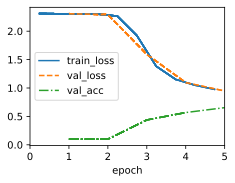

In [4]:
trainer = d2l.Trainer(max_epochs=5, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet_naive(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

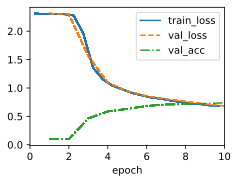

In [5]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
model = LeNet_naive(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

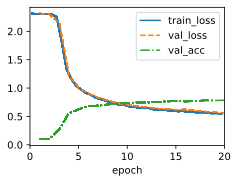

In [6]:
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)
model = LeNet_naive(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [14]:
class LeNet_modern(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes)
        )

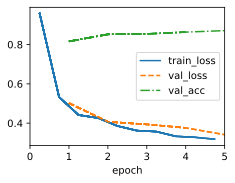

In [8]:
trainer = d2l.Trainer(max_epochs=5, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet_modern(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

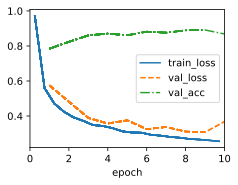

In [9]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
model = LeNet_modern(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

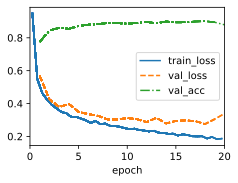

In [10]:
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)
model = LeNet_modern(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [16]:
# import torchvision
# from torchvision import transforms, datasets
# from torch.utils.data import DataLoader

# # Define the transformations for the dataset
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))
# ])

# # Load the MNIST dataset
# train_dataset = datasets.MNIST(root='./data/MNIST/', train=True, download=False, transform=transform)
# test_dataset = datasets.MNIST(root='./data', train=False, download=False, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# trainer = d2l.Trainer(max_epochs=5, num_gpus=1)
# model = LeNet_modern()
# model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)

# trainer.fit()

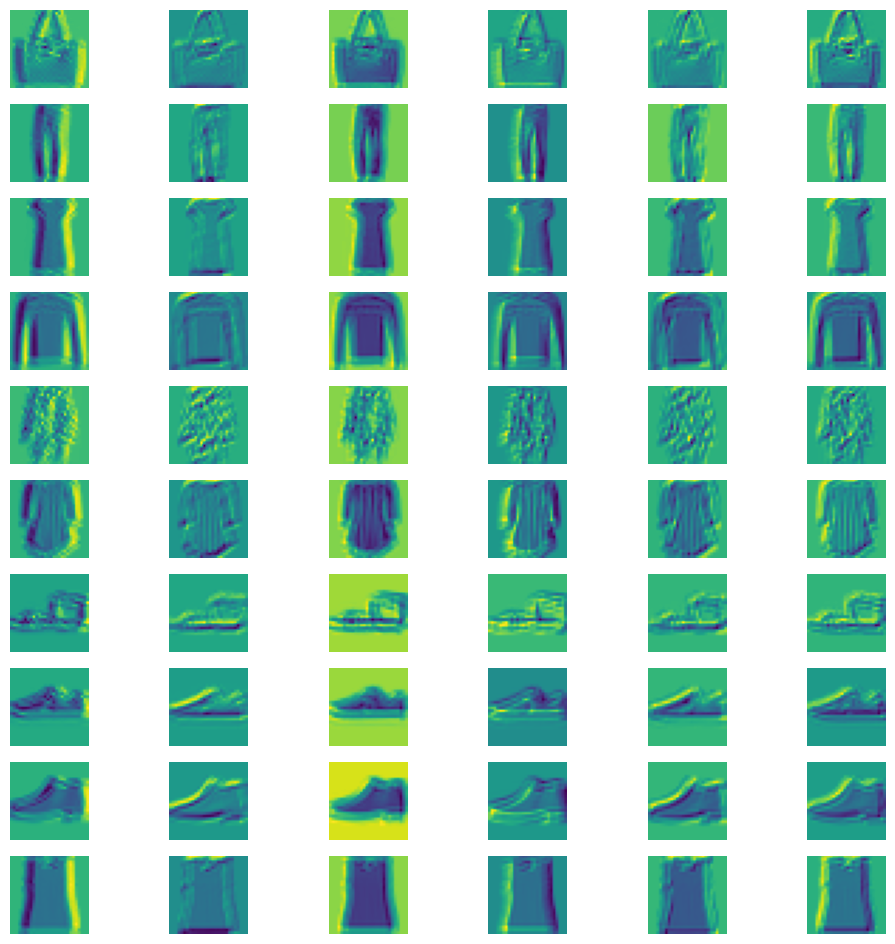

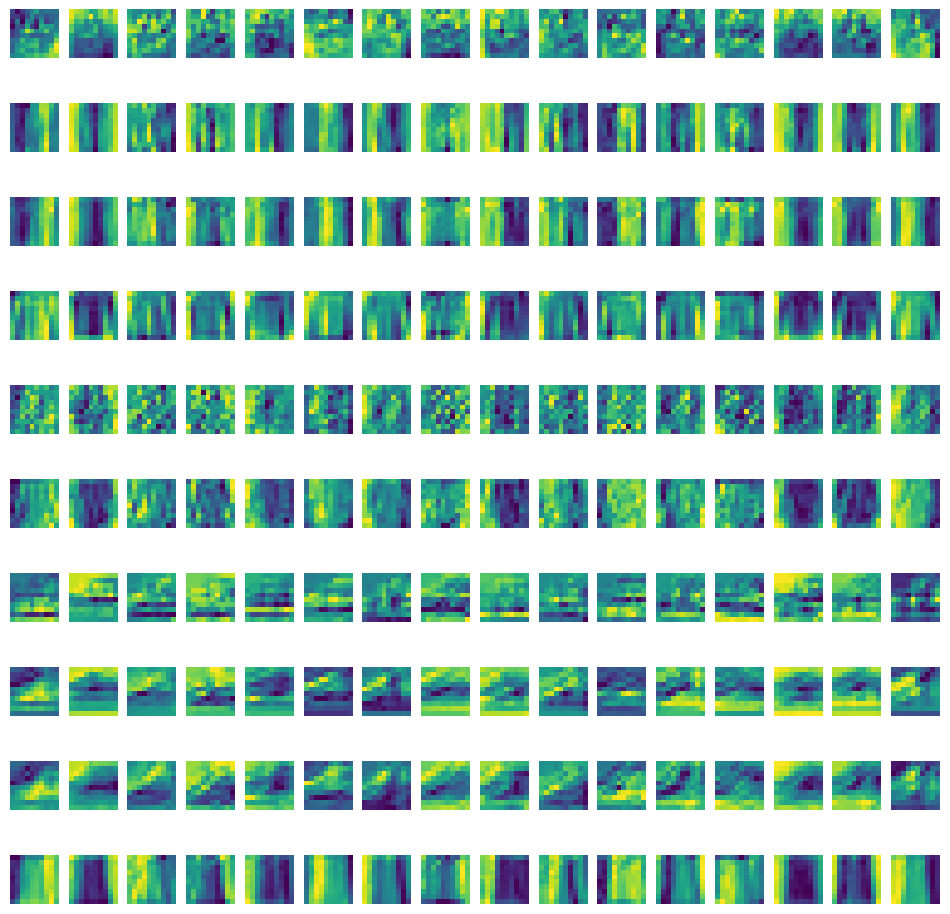

In [11]:
import matplotlib.pyplot as plt

data = d2l.FashionMNIST(batch_size=128)
model = LeNet_naive()

# Store the activations
activations = {}

# Wrapper for dictionary
def hook_wrapper(name):
    def activation_hook(model, input, output):
        activations[name] = output.detach()
    return activation_hook # I think this detaches the hook

model.net[0].register_forward_hook(hook_wrapper('Conv2d_0'))
model.net[3].register_forward_hook(hook_wrapper('Conv2d_1'))

data_iter = iter(data.get_dataloader(True))
X, y = next(data_iter) # images, labels

output = model(X)

def visualize_activations(activations, layer_name, num_images=10):
    act = activations[layer_name]
    fig, axes = plt.subplots(num_images, act.size(1), figsize=(12, 12))
    for i in range(num_images):
        for j in range(act.size(1)):
            axes[i, j].imshow(act[i, j].cpu().numpy(), cmap='viridis')
            axes[i, j].axis('off')
    plt.show()

visualize_activations(activations, 'Conv2d_0')
visualize_activations(activations, 'Conv2d_1')

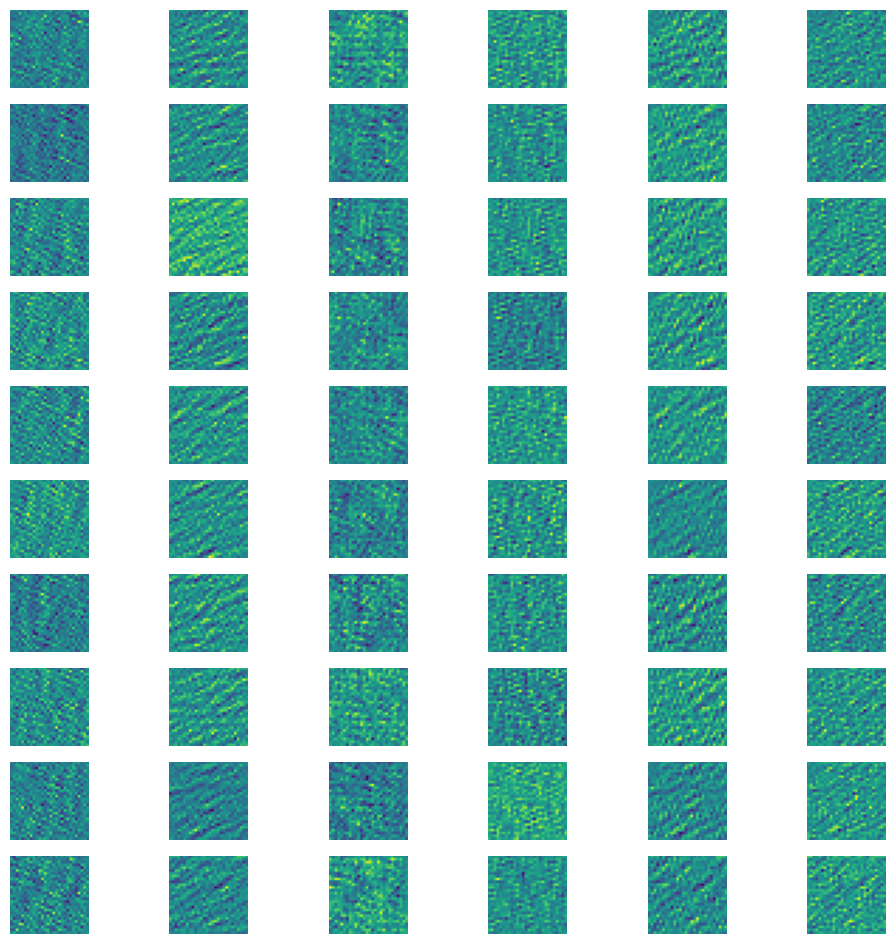

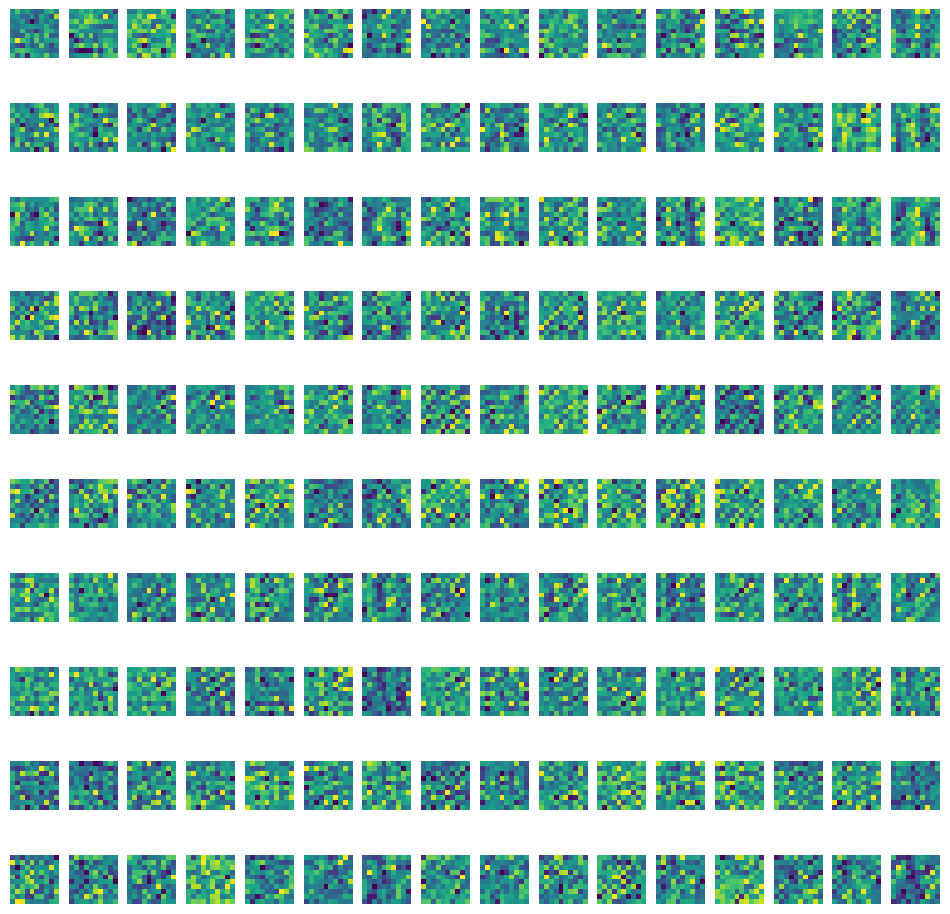

In [12]:
# Random noise activations
X = torch.randn(128, 1, 28, 28)

activations = {}
model.net[0].register_forward_hook(hook_wrapper('Conv2d_0'))
model.net[3].register_forward_hook(hook_wrapper('Conv2d_1'))

output = model(X)
visualize_activations(activations, 'Conv2d_0')
visualize_activations(activations, 'Conv2d_1')

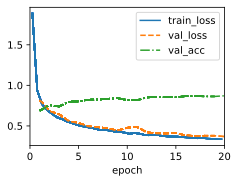

In [15]:
data = d2l.FashionMNIST(batch_size=128)
model = LeNet_modern(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)
trainer.fit(model, data)

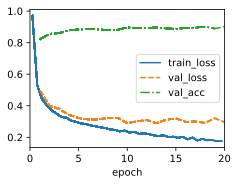

In [16]:
model = LeNet_modern(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)
trainer.fit(model, data)

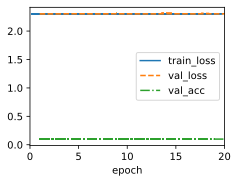

In [17]:
model = LeNet_modern(lr=1.0)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)
trainer.fit(model, data)